In [145]:
# Импортируем модули для расчётов, визуализации и сравнения результатов

from scipy_dae.integrate import solve_dae
import numpy as np
import matplotlib.pyplot as plt
import csv

In [146]:
# Рассматривается одномерная задача о сильном взрыве (задача Л. И. Седова)

nu = 1. # плоская симметрия
n = (2. + nu) / (2. * nu) # случай, допускающий автомодельное решение
gam = 1.4 # показатель адиабаты
bet = 0.5 # параметр автомодельного решения
rho_10 = 1. # начальная плотность газа
rho_20 = 260. # плотность твёрдых включений

sig = 0. # межфазный теплообмен не учитываем
K = 0.

alp2 = 0.001 # объёмная доля твёрдых включений (в модели МАрбла используется лишь в задании ГУ)

# Решаем систему обыкновенных дифференциальных уравнений
def fun(t, y, yp):
    F = np.zeros(7)

    l = t

    r1, u1, e1, r2, u2, e2, p = y
    r1d, u1d, e1d, r2d, u2d, e2d, pd = yp
    # Используется модель Марбла
    F[0] = (u1 - l) * r1d + r1 * u1d + (nu - 1.) / l * r1 * u1
    F[1] = r1 * (u1 - l) * u1d + pd - nu / 2. * r1 * u1 + bet * r2 * e1**n * (u1 - u2)
    F[2] = r1 * (u1 - l) * e1d + p * u1d + (nu - 1.) / l * p * u1 - nu * r1 * e1 - bet * r2 * e1**n * (u1 - u2)**2. + sig * bet * r2 * e1**n * (e1 - e2)
    F[3] = (u2 - l) * r2d + r2 * u2d + (nu - 1.) / l * r2 * u2
    F[4] = (u2 - l) * u2d - nu / 2. * u2 - bet * e1**n * (u1 - u2)
    F[5] = (u2 - l) * e2d - nu * e2 - K * sig * bet * e1**n * (e1 - e2)
    F[6] = y[6] - (gam - 1.) * r1 * e1 # система замыкается уравнением состояния газовой фазы
    return F

# Начальные условия (соотношения Ренкина - Гюгонио)
y0 = np.array([(gam + 1.) / (gam - 1.), 2. / (gam + 1.), 2. / (gam + 1.)**2., alp2 * rho_20 / rho_10, 0., 0., 2. / (gam + 1.)])
yp0 = np.ones(7)

t_span = (1., 0.01)
t_eval = np.linspace(1., 0.05, 500)
sol = solve_dae(fun, t_span, y0, yp0, t_eval=t_eval)

In [147]:
# Сравнение результатов
lam, R1, U1, E1, R2, U2, E2 = [], [], [], [], [], [], []
with open('Correct_data.dat', 'r') as datafile:
    plotting = csv.reader(datafile, delimiter=' ')
    for ROWS in plotting:
            lam.append(float(ROWS[0]))
            R1.append(float(ROWS[1]))
            U1.append(float(ROWS[2]))
            E1.append(float(ROWS[3]))
            R2.append(float(ROWS[4]))
            U2.append(float(ROWS[5]))
            E2.append(float(ROWS[6]))

/tmp/ipykernel_4440/739870621.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


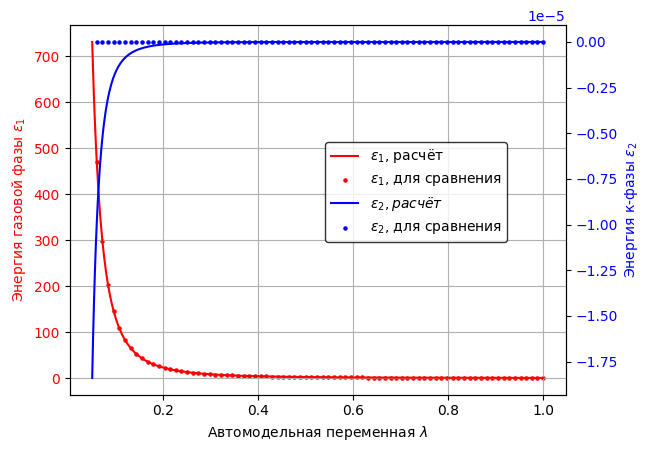

In [148]:
fig, ax1 = plt.subplots() 
ax1.set_xlabel('Автомодельная переменная $\lambda$') 
ax1.set_ylabel('Энергия газовой фазы ' + r'$\varepsilon_1$', color = 'r') 
ax1.plot(sol.t, sol.y[2], color = 'r', label = r'$\varepsilon_1$, расчёт')
ax1.scatter(lam[::5], E1[::5], color = 'r', s = 5, label = r'$\varepsilon_1$, для сравнения')
ax1.tick_params(axis ='y', labelcolor = 'r') 
ax1.grid()
  
ax2 = ax1.twinx() 
ax2.set_ylabel('Энергия к-фазы ' + r'$\varepsilon_2$', color = 'b') 
ax2.plot(sol.t, sol.y[5], color = 'b', label = r'$\varepsilon_2, расчёт$')
ax2.scatter(lam[::5], E2[::5], color = 'b', s = 5, label = r'$\varepsilon_2$, для сравнения')

ax2.tick_params(axis ='y', labelcolor = 'b')
fig.legend(loc=[0.5,0.465],edgecolor='black', facecolor='w')
fig.show()

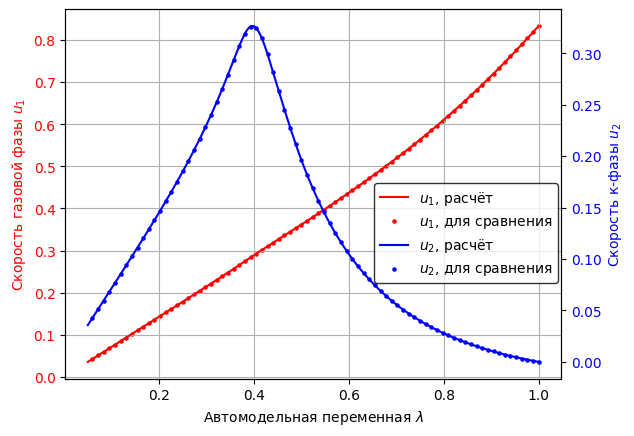

In [149]:
fig, ax1 = plt.subplots() 
ax1.set_xlabel('Автомодельная переменная $\lambda$') 
ax1.set_ylabel('Скорость газовой фазы ' + r'$u_1$', color = 'r') 
ax1.plot(sol.t, sol.y[1], color = 'r', label = r'$u_1$, расчёт')
ax1.scatter(lam[::5], U1[::5], color = 'r', s = 5, label = r'$u_1$, для сравнения')
ax1.tick_params(axis ='y', labelcolor = 'r') 
ax1.grid()
  
ax2 = ax1.twinx() 
ax2.set_ylabel('Скорость к-фазы ' + r'$u_2$', color = 'b') 
ax2.plot(sol.t, sol.y[4], color = 'b', label = r'$u_2$, расчёт')
ax2.scatter(lam[::5], U2[::5], color = 'b', s = 5, label = r'$u_2$, для сравнения')
ax2.tick_params(axis ='y', labelcolor = 'b')
fig.legend(loc=[0.59,0.35],edgecolor='black', facecolor='w')

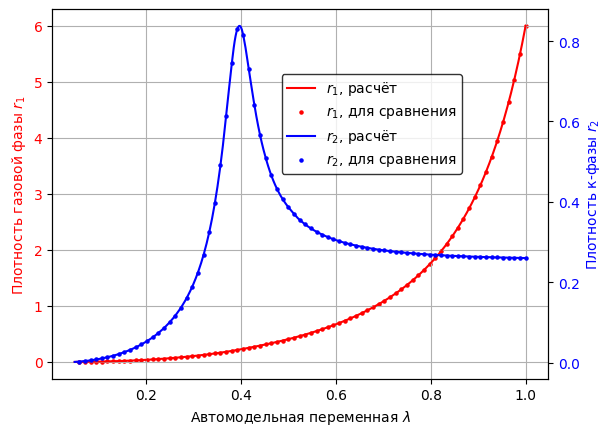

In [150]:
fig, ax1 = plt.subplots() 
ax1.set_xlabel('Автомодельная переменная $\lambda$') 
ax1.set_ylabel('Плотность газовой фазы ' + r'$r_1$', color = 'r') 
ax1.plot(sol.t, sol.y[0], color = 'r', label = r'$r_1$, расчёт')
ax1.scatter(lam[::5], R1[::5], color = 'r', s = 5, label = r'$r_1$, для сравнения')
ax1.tick_params(axis ='y', labelcolor = 'r') 
ax1.grid()
  
ax2 = ax1.twinx() 
ax2.set_ylabel('Плотность к-фазы ' + r'$r_2$', color = 'b') 
ax2.plot(sol.t, sol.y[3], color = 'b', label = r'$r_2$, расчёт')
ax2.scatter(lam[::5], R2[::5], color = 'b', s = 5, label = r'$r_2$, для сравнения')
ax2.tick_params(axis ='y', labelcolor = 'b')
fig.legend(loc=[0.46, 0.6],edgecolor='black', facecolor='w')